# Method 1: Using sklearn and numpy packages

## Step 0: Import library

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

## Step 1: Generate Gaussian Random Vectors

In [33]:
np.random.seed(42)  # for reproducibility

# Parameters
num_samples = 50
mean_class1 = 0
mean_class2 = 2
covariance_matrix = np.eye(2)

# Generate random vectors
class1_samples = np.random.multivariate_normal([mean_class1, mean_class1], covariance_matrix, num_samples)
class2_samples = np.random.multivariate_normal([mean_class2, mean_class2], covariance_matrix, num_samples)

## Step 2: Split Data into Training and Testing Sets

In [34]:
# Concatenate and shuffle data
all_samples = np.concatenate((class1_samples, class2_samples), axis=0)
labels = np.concatenate((np.zeros(num_samples), np.ones(num_samples)))

# Shuffle data
shuffled_indices = np.random.permutation(2 * num_samples)
all_samples = all_samples[shuffled_indices]
labels = labels[shuffled_indices]

# Split into training and testing sets
ntr_values = [10, 20, 30]
nts_values = list(np.array(num_samples) - ntr_values)


## Step 3: Train and Evaluate the Perceptron

Weights after training with ntr=10:
[[-0.90524575  2.3849214 ]]
Biases after training with ntr=10:
[-1.]
Performance with ntr=10 and nts=40: Accuracy=67.78%


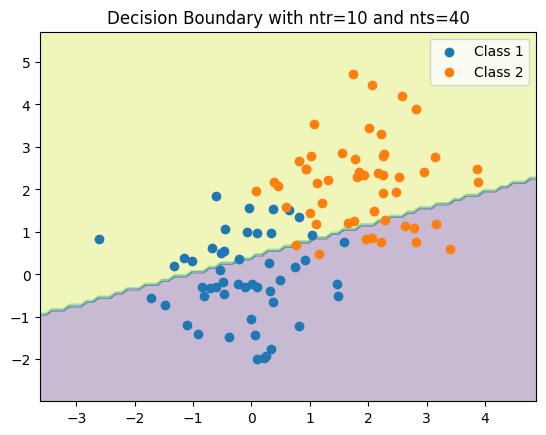

Weights after training with ntr=20:
[[0.3274158  1.76782512]]
Biases after training with ntr=20:
[-1.]
Performance with ntr=20 and nts=30: Accuracy=86.25%


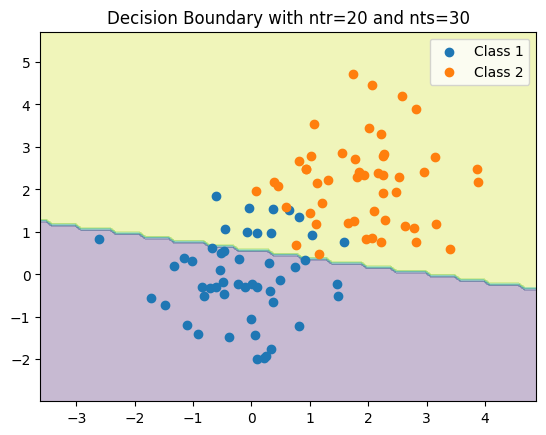

Weights after training with ntr=30:
[[2.29576408 2.21582214]]
Biases after training with ntr=30:
[-3.]
Performance with ntr=30 and nts=20: Accuracy=91.43%


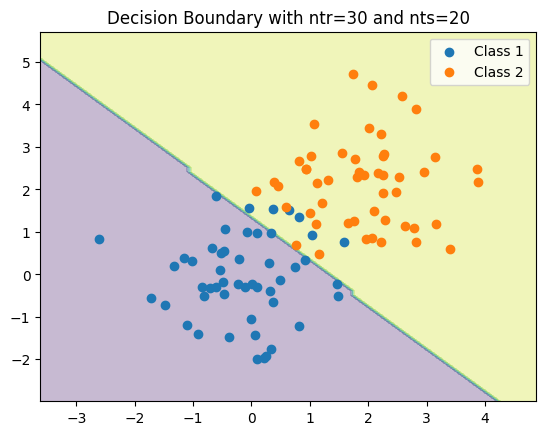

In [35]:
# Function to train and evaluate the perceptron
def train_and_evaluate(ntr_value,nts_value):
    best_accuracy = 0
    best_model = None

    # Create Perceptron model
    model = Perceptron(random_state=42)

    for _ in range(5):
        # Train the perceptron with learning data
        model.fit(all_samples[:ntr_value], labels[:ntr_value])

        # Evaluate on test data
        predictions = model.predict(all_samples[ntr_value:])
        accuracy = accuracy_score(labels[ntr_value:], predictions)

        # Keep track of the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    print(f"Weights after training with ntr={ntr_value}:\n{best_model.coef_}")
    print(f"Biases after training with ntr={ntr_value}:\n{best_model.intercept_}")
    print(f"Performance with ntr={ntr_value} and nts={nts_value}: Accuracy={best_accuracy:.2%}")

    # Plot decision boundary
    x_min, x_max = all_samples[:, 0].min() - 1, all_samples[:, 0].max() + 1
    y_min, y_max = all_samples[:, 1].min() - 1, all_samples[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(class1_samples[:, 0], class1_samples[:, 1], label='Class 1')
    plt.scatter(class2_samples[:, 0], class2_samples[:, 1], label='Class 2')
    plt.title(f'Decision Boundary with ntr={ntr_value} and nts={nts_value}')
    plt.legend()
    plt.show()

# Train and evaluate for each ntr value
for ntr, nts in zip(ntr_values, nts_values):
    train_and_evaluate(ntr, nts)

# Method 2: Using only numpy package

## Step 0: Import library

In [42]:
import numpy as np
import matplotlib.pyplot as plt


## Step 1: Generate Gaussian Random Vectors

In [43]:
# Set the parameters for the distributions
mean_1, variance_1 = 0, 1
mean_2, variance_2 = 2, 1

# Generate one random number from each distribution
random_number_1 = np.random.normal(mean_1, np.sqrt(variance_1) , 50)
random_number_2 = np.random.normal(mean_2, np.sqrt(variance_2) , 50)

## Step 2: Generate Labels for input data

In [44]:
# Create labels for the two classes
labels_1 = np.zeros(50, dtype=int)  # Labels for the first class (mean 0, variance 1)
labels_2 = np.ones(50, dtype=int)   # Labels for the second class (mean 2, variance 1)

# Combine the random numbers with their respective labels
combined_data_1 = np.column_stack((random_number_1, labels_1))
combined_data_2 = np.column_stack((random_number_2, labels_2))

# Concatenate the two classes to create a single dataset
combined_dataset = np.concatenate((combined_data_1, combined_data_2))

## Step 3: Split Data into Training and Testing Sets

In [45]:
def split_data_for_training_and_testing(dataset, num_per_class_for_training):
    """
    Split the dataset into training and testing sets based on the specified number per class for training.

    :param dataset: Combined dataset with labels.
    :param num_per_class_for_training: Number of samples per class for the training set.
    :return: A tuple of (training_data, testing_data).
    """
    # Shuffle the dataset to ensure randomness
    np.random.shuffle(dataset)

    # Extract the subsets for each class
    data_class_0 = dataset[dataset[:, 1] == 0]
    data_class_1 = dataset[dataset[:, 1] == 1]

    # Split the data for each class into training and testing
    training_data_class_0 = data_class_0[:num_per_class_for_training]
    training_data_class_1 = data_class_1[:num_per_class_for_training]
    
    testing_data_class_0 = data_class_0[num_per_class_for_training:num_per_class_for_training*2]
    testing_data_class_1 = data_class_1[num_per_class_for_training:num_per_class_for_training*2]

    # Combine the training data from both classes
    training_data = np.concatenate((training_data_class_0, training_data_class_1))
    
    # Combine the testing data from both classes
    testing_data = np.concatenate((testing_data_class_0, testing_data_class_1))

    return training_data, testing_data

# Split the data for different sizes of the training set: 10, 20, and 30 per class
training_data_10, testing_data_10 = split_data_for_training_and_testing(combined_dataset, 10)
training_data_20, testing_data_20 = split_data_for_training_and_testing(combined_dataset, 20)
training_data_30, testing_data_30 = split_data_for_training_and_testing(combined_dataset, 30)


## Step 4: Train and Evaluate the Perceptron

In [46]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=5, initial_weights=None, initial_bias=None):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.array(initial_weights) if initial_weights is not None else np.random.rand(input_size)
        self.bias = initial_bias if initial_bias is not None else np.random.rand()
    
    def activation(self, x):
        # Sigmoid function
        return 1 / (1 + np.exp(-x))
    
    def predict(self, inputs):
        # Weighted sum of inputs + bias (where inputs includes a '1' for the bias weight)
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activation(weighted_sum)
    
    def train(self, training_inputs, labels):
        # Ensure training_inputs is 2D
        training_inputs = training_inputs.reshape(-1, 1)
        # Add a '1' for the bias weight to each set of inputs
        training_inputs_with_bias = np.hstack((training_inputs, np.ones((training_inputs.shape[0], 1))))
        
        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs_with_bias, labels):
                prediction = self.predict(inputs)
                # Update weights - the last weight is the bias weight
                # Gradient of the sigmoid function for error calculation
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
            
            # Calculate accuracy and error for the epoch
            epoch_accuracy, epoch_error = self.calculate_accuracy_and_error(training_inputs_with_bias, labels)
            print(f'Epoch {epoch+1}/{self.epochs} - Weights: {self.weights}, Bias: {self.bias}, Accuracy: {epoch_accuracy}, Error: {epoch_error}')
    
    def calculate_accuracy_and_error(self, test_inputs_with_bias, test_labels):
        predictions = [self.predict(inputs) for inputs in test_inputs_with_bias]
        # Binarize predictions for accuracy calculation
        binarized_predictions = [1 if p >= 0.5 else 0 for p in predictions]
        errors = test_labels - binarized_predictions
        accuracy = np.mean(np.array(binarized_predictions) == test_labels)
        
        return accuracy, np.sum(errors ** 2)

# Set initial weights and bias to be the same for all models
initial_weights = [0.5, -0.5]
initial_bias = 0.5

# Now, create a perceptron object with the same initial weights and bias for different training set sizes
# Training data size of 10
perceptron_10 = SingleLayerPerceptron(input_size=2, learning_rate=0.01, epochs=5, initial_weights=initial_weights, initial_bias=initial_bias)
# Training data size of 20
perceptron_20 = SingleLayerPerceptron(input_size=2, learning_rate=0.01, epochs=5, initial_weights=initial_weights, initial_bias=initial_bias)
# Training data size of 30
perceptron_30 = SingleLayerPerceptron(input_size=2, learning_rate=0.01, epochs=5, initial_weights=initial_weights, initial_bias=initial_bias)

# Train the perceptron models
print("Training with 10 data points:")
perceptron_10.train(training_data_10[:, 0], training_data_10[:, -1])
print("\nTraining with 20 data points:")
perceptron_20.train(training_data_20[:, 0], training_data_20[:, -1])
print("\nTraining with 30 data points:")
perceptron_30.train(training_data_30[:, 0], training_data_30[:, -1])


Training with 10 data points:
Epoch 1/5 - Weights: [ 0.52122571 -0.51989761], Bias: 0.4801023889965372, Accuracy: 0.65, Error: 7.0
Epoch 2/5 - Weights: [ 0.54187932 -0.53884961], Bias: 0.46115039212199177, Accuracy: 0.65, Error: 7.0
Epoch 3/5 - Weights: [ 0.56197751 -0.55691823], Bias: 0.4430817706193759, Accuracy: 0.7, Error: 6.0
Epoch 4/5 - Weights: [ 0.58153727 -0.57416128], Bias: 0.4258387184576873, Accuracy: 0.7, Error: 6.0
Epoch 5/5 - Weights: [ 0.60057568 -0.59063239], Bias: 0.4093676119930554, Accuracy: 0.75, Error: 5.0

Training with 20 data points:
Epoch 1/5 - Weights: [ 0.53893118 -0.54404945], Bias: 0.45595054532535656, Accuracy: 0.625, Error: 15.0
Epoch 2/5 - Weights: [ 0.57716953 -0.58446202], Bias: 0.4155379757524126, Accuracy: 0.7, Error: 12.0
Epoch 3/5 - Weights: [ 0.6144028  -0.62175156], Bias: 0.37824844092908816, Accuracy: 0.725, Error: 11.0
Epoch 4/5 - Weights: [ 0.65045535 -0.6563289 ], Bias: 0.34367110265984446, Accuracy: 0.725, Error: 11.0
Epoch 5/5 - Weights: [

<p>In classification tasks, <strong>accuracy</strong> is defined as the number of correct predictions divided by the total number of predictions. Error can be measured in several ways, but in the context of classification, it's typically defined as one minus the accuracy when you're dealing with a single error metric (like classification error).</p>

<p>However, the "error" we're talking about here is the <strong>sum of squared errors (SSE)</strong>, which is a different concept. It represents the sum of the squared differences between the predicted values and the actual values. Since we're dealing with a binary classification problem and predictions that are either 0 or 1, the SSE can be thought of as the count of misclassified samples, not directly related to the accuracy in a subtractive way.</p>

<p>The accuracy and the sum of squared errors are related but not in a directly subtractive way (i.e., they do not add up to 1). Accuracy is a measure of the proportion of correct predictions, while SSE is a measure of the magnitude of errors. In the case of binary outcomes, where predictions and actual values are 0 or 1, the SSE is just the count of incorrect predictions.</p>

<p>To get a value that complements the accuracy to sum to 1, you would look at the <strong>classification error rate</strong>, which is calculated as:</p>
<p><code>Error Rate = 1 - Accuracy</code></p>
<p>This would represent the proportion of incorrect predictions and would indeed add up to 1 when combined with the accuracy.</p>

<p>The values provided earlier are the accuracy (the proportion of correct predictions) and the sum of squared errors, not the error rate. If you need the error rate instead, you can simply calculate it by subtracting the accuracy from 1.</p>


## Step 5: Plot decision boundary

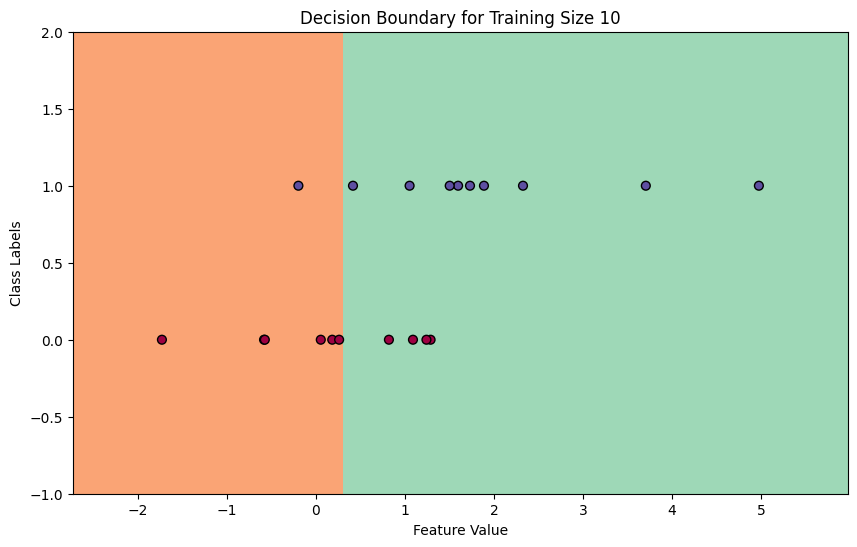

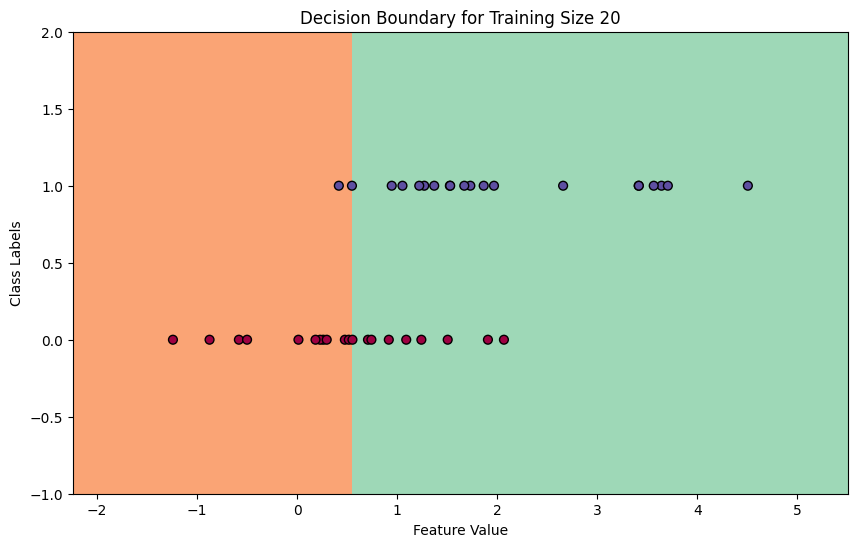

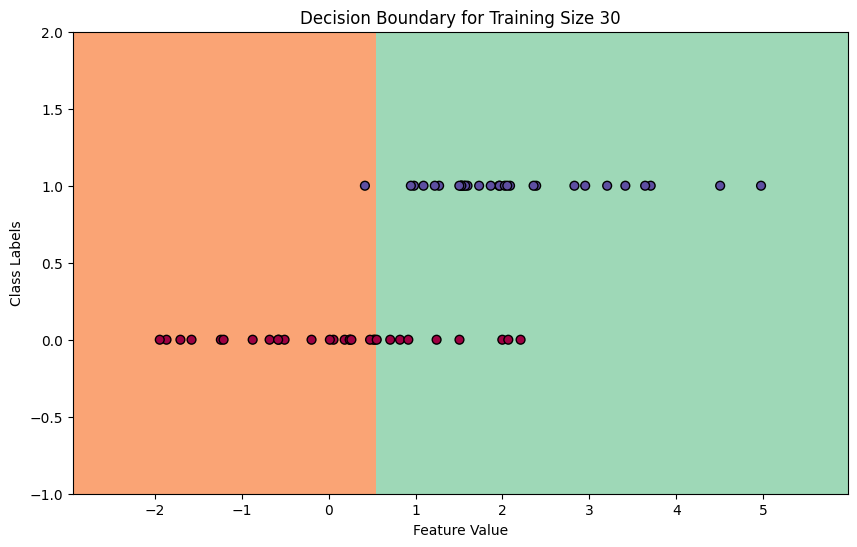

In [47]:
def plot_decision_boundary(perceptron, training_data, labels, title):
    # Set min and max values and give it some padding
    x_min, x_max = training_data[:, 0].min() - 1, training_data[:, 0].max() + 1
    y_min, y_max = labels.min() - 1, labels.max() + 1
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 2))
    # Flatten the grid to pass into model
    grid = np.c_[xx.ravel(), np.ones_like(xx.ravel())]  # We only use the first input feature and a bias term of 1

    # Predict the function value for the whole grid
    Z = perceptron.predict(grid)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3), cmap=plt.cm.Spectral)
    plt.scatter(training_data[:, 0], labels, c=labels, s=40, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature Value")
    plt.ylabel("Class Labels")
    plt.show()

# Plot the decision boundary for each perceptron
plot_decision_boundary(perceptron_10, training_data_10[:, :1], training_data_10[:, -1], "Decision Boundary for Training Size 10")
plot_decision_boundary(perceptron_20, training_data_20[:, :1], training_data_20[:, -1], "Decision Boundary for Training Size 20")
plot_decision_boundary(perceptron_30, training_data_30[:, :1], training_data_30[:, -1], "Decision Boundary for Training Size 30")
